In [1]:
import numpy as np
import importlib
from matplotlib import pyplot as plt
import pandas as pd
import math
import os
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import sklearn
%matplotlib inline

import analyzer
import subject
import visualization
import utils
importlib.reload(analyzer)
importlib.reload(subject)
importlib.reload(visualization)
importlib.reload(utils)

<module 'utils' from '/Users/bang/workspace/iFEED_experiment_result_analysis_2019/utils.py'>

Set file paths

In [2]:
rootPath = os.getcwd()
dataFilePath = os.path.join(rootPath, 'data')

In [3]:
surveyDataFilePath = os.path.join(dataFilePath, 'survey.csv')
loggedDataFilesRootPath = dataFilePath

Initialize the analyzer

In [4]:
resultAnalyzer = analyzer.ResultAnalyzer(surveyDataFilePath, loggedDataFilesRootPath)

In [5]:
resultAnalyzer.gradeAnswers(confidenceThreshold=10)

In [6]:
resultAnalyzer.computeIGD(os.path.join(rootPath, 'target_selection.csv'), useShortestDistance=True)

In [7]:
resultAnalyzer.computeHV(os.path.join(rootPath, 'target_selection.csv'))

In [8]:
s0 = resultAnalyzer.subjects[0]
s1 = resultAnalyzer.subjects[1]
s2 = resultAnalyzer.subjects[2]
s3 = resultAnalyzer.subjects[3]
s4 = resultAnalyzer.subjects[4]
s5 = resultAnalyzer.subjects[5]
s6 = resultAnalyzer.subjects[6]


# Get DataFrame

In [9]:
df = resultAnalyzer.getDataFrame(option="all",excludeHV=False, adjustIGDUsingEntropy=False)
df

,id,condition,type,DS_numDesignEvaluated,HV,conf_dcl,conf_fpwc,FS_numFeatureTested,normalizedSA,HScore,...,meanDist2UP,dpwc,entropy,dcl,NScore,selfAssessment,adjustedIGD,FScore,totalScore,PScore
0,5401038285006004819-9_15_19_13,interactive,explicit,12,0.544,0.634,0.401,7,0.571,0.86,...,0.831,0.67,0.717,0.78,1.00,2.50,0.707,0.73,0.73,0.44
1,3700789476005004819-9_16_15_58,automated,explicit,42,0.643,0.859,0.309,6,0.000,0.29,...,0.436,0.33,1.392,0.67,0.33,1.50,0.297,0.28,0.39,0.22
2,3664515135004004819-9_20_14_13,manual,implicit,16,0.472,0.673,0.533,11,0.571,0.29,...,0.813,0.33,0.991,0.44,0.44,2.50,0.511,0.56,0.47,0.67
3,3221520754006004819-10_2_6_8,interactive,explicit,14,0.506,0.268,0.134,5,0.429,0.43,...,0.623,0.78,0.671,0.67,0.67,2.25,1.000,0.39,0.56,0.11
4,5577734270005004819-10_4_13_54,automated,explicit,22,0.416,0.514,0.433,8,0.857,0.57,...,0.510,0.22,1.056,0.67,0.56,3.00,0.000,0.50,0.47,0.44
5,1708104476004004819-10_8_16_14,manual,implicit,24,0.503,0.326,0.212,14,0.429,0.14,...,0.915,0.11,0.997,0.44,0.44,2.25,0.213,0.39,0.33,0.33
6,5772081801006004819-10_10_13_3,interactive,explicit,28,0.413,0.802,0.503,12,1.000,0.86,...,0.674,0.78,1.094,1.00,0.78,3.25,0.328,0.78,0.83,0.78


In [10]:
resultAnalyzer.getDataFrame(option="learningTask")

,id,condition,type,LT_numDesignViewed,LT_numFeatureViewed,LT_numFilterUsed,LT_numFeatureFound
0,5401038285006004819-9_15_19_13,interactive,explicit,62,42,0,77
1,3700789476005004819-9_16_15_58,automated,explicit,751,9,0,30
2,3664515135004004819-9_20_14_13,manual,implicit,1018,10,21,0
3,3221520754006004819-10_2_6_8,interactive,explicit,34,14,0,77
4,5577734270005004819-10_4_13_54,automated,explicit,42,10,0,31
5,1708104476004004819-10_8_16_14,manual,implicit,436,12,11,10
6,5772081801006004819-10_10_13_3,interactive,explicit,23,25,1,50


In [11]:
resultAnalyzer.getDataFrame(option="featureSynthesis")

,id,condition,type,meanDist2UP,normalizedDist2UP,FS_numFeatureViewed,FS_numFilterUsed,FS_numFeatureTested
0,5401038285006004819-9_15_19_13,interactive,explicit,0.831,0.175,1,8,7
1,3700789476005004819-9_16_15_58,automated,explicit,0.436,1.000,0,7,6
2,3664515135004004819-9_20_14_13,manual,implicit,0.813,0.213,11,9,11
3,3221520754006004819-10_2_6_8,interactive,explicit,0.623,0.610,4,5,5
4,5577734270005004819-10_4_13_54,automated,explicit,0.510,0.846,0,9,8
5,1708104476004004819-10_8_16_14,manual,implicit,0.915,0.000,2,14,14
6,5772081801006004819-10_10_13_3,interactive,explicit,0.674,0.503,6,11,12


In [12]:
resultAnalyzer.getDataFrame(option="designSynthesis")

,id,condition,type,meanIGD,normalizedIGD,adjustedIGD,numDesigns,DS_numDesignViewed,DS_numDesignEvaluated,entropy
0,5401038285006004819-9_15_19_13,interactive,explicit,0.073,0.606,0.707,12,28,12,0.717
1,3700789476005004819-9_16_15_58,automated,explicit,0.034,0.891,0.297,42,62,42,1.392
2,3664515135004004819-9_20_14_13,manual,implicit,0.076,0.584,0.511,16,38,16,0.991
3,3221520754006004819-10_2_6_8,interactive,explicit,0.019,1.000,1.000,14,33,14,0.671
4,5577734270005004819-10_4_13_54,automated,explicit,0.156,0.000,0.000,22,36,22,1.056
5,1708104476004004819-10_8_16_14,manual,implicit,0.106,0.365,0.213,24,48,24,0.997
6,5772081801006004819-10_10_13_3,interactive,explicit,0.066,0.657,0.328,28,43,28,1.094


In [ ]:
df1 = df[['FScore','meanDist2UP','meanIGD','selfAssessment']]
print(df1.to_string(index=False))

# Demographic data

In [ ]:
s0.demographic_data

In [ ]:
s1.demographic_data

In [ ]:
s2.demographic_data

In [ ]:
s3.demographic_data

In [ ]:
s4.demographic_data

In [ ]:
s5.demographic_data

# Get transcript comments

In [ ]:
subjects_manual = resultAnalyzer.filterSubjects(condition=4)
subjects_auto = resultAnalyzer.filterSubjects(condition=5)
subjects_interactive = resultAnalyzer.filterSubjects(condition=6)

In [ ]:
comments = resultAnalyzer.getComments(resultAnalyzer.subjects, "problem_solving_task", "F_cl_3", displayCondition=True, displayParticipantID=False, displayKeyword=False)

for line in comments:
    print(line)
    print("")
    

In [ ]:
resultAnalyzer.getComments(subjects_manual, "problem_solving_task", "F", displayParticipantID=False, displayKeyword=True)


In [ ]:
resultAnalyzer.getComments(subjects_auto, "problem_solving_task", "F_cl", displayParticipantID=False, displayKeyword=True)


In [ ]:
comments = resultAnalyzer.getComments(resultAnalyzer.subjects, "survey", "gen", displayCondition=True, displayParticipantID=False, displayKeyword=True)

for line in comments:
    print(line + "\n")

# Synthesis task data visualization

In [ ]:
g1 = [s2, s5]
g2 = [s1, s4]
g3 = [s0, s3, s6]
# g3 = [s6]

In [ ]:
visualizer = visualization.Visualizer(groups=[g1,g2,g3], groupNames=['Manual','Automated','Interactive'])

In [ ]:
visualizer.designSynthesisScatter(markers=['o','^','d'])


In [ ]:
visualizer.featureSynthesisScatter(markers=['o','^','d'])


# Parallel coordinates

In [ ]:
visualizer.setDataFrame(df)

In [ ]:
visualizer.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc'], 
                                figsize=(11,5),
                               legend=["Interactive","Automated","Manual"])

In [ ]:
visualizer.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                               legend=["Interactive","Automated","Manual"])

In [ ]:
PROP_CYCLE = plt.rcParams['axes.prop_cycle']
COLORS = PROP_CYCLE.by_key()['color']

In [ ]:
tempVis = visualization.Visualizer(groups=[g3], groupNames=['Interactive'])
tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "interactive"]
tempVis.setDataFrame(tempDF)

tempVis.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                               legend=["Interactive"])

In [ ]:

tempVis = visualization.Visualizer(groups=[g3], groupNames=['Automated'])

tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "automated"]
tempVis.setDataFrame(tempDF)

tempVis.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                                colors=[COLORS[1]],
                               legend=["Automated"])



In [ ]:
tempVis = visualization.Visualizer(groups=[g3], groupNames=['Manual'])

tempDF = resultAnalyzer.getDataFrame().loc[df['condition'] == "manual"]
tempVis.setDataFrame(tempDF)

tempVis.parallelCoordinates(columns=['fcl','fpwc','dcl','dpwc','FScore','DScore','PScore','NScore','HScore','LScore','totalScore'], 
                                figsize=(15,5),
                            colors=[COLORS[2]],
                               legend=["Manual"])


# Box plots

In [ ]:
# visualizer.boxPlot(columns=['FScore','DScore', 'totalScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [ ]:
# visualizer.boxPlot(columns=['PScore','NScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [ ]:
# visualizer.boxPlot(columns=['HScore','LScore', 'FScore'], nrows=1, ncols=3, sharey=True, figsize=(14,4.5))

In [ ]:
# visualizer.boxPlot(columns=['meanDist2UP', 'meanIGD', 'totalScore'], nrows=1, ncols=3, sharey=False, figsize=(14,4.5))

In [ ]:
visualizer.barPlot(columns=['FScore','DScore', 'totalScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))


In [ ]:
visualizer.barPlot(columns=['fcl','fpwc','dcl','dpwc'], showError=True, nrows=1, ncols=4, sharey=True, figsize=(16,3))


In [ ]:
visualizer.barPlot(columns=['PScore','NScore', 'FScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))

In [ ]:
visualizer.barPlot(columns=['HScore','LScore', 'FScore'], showError=True, nrows=1, ncols=3, sharey=True, figsize=(13,3))

In [ ]:
visualizer.barPlot(dataFrame=df, columns=['selfAssessment', 'meanIGD', 'meanDist2UP', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))
visualizer.barPlot(dataFrame=df, columns=['selfAssessmentExclude1', 'meanIGD', 'meanDist2UP', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))



In [ ]:
visualizer.barPlot(dataFrame=df, columns=['normalizedIGD', 'adjustedIGD', 'selfAssessment', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


In [ ]:
visualizer.barPlot(dataFrame=df, columns=['HV', 'adjustedHV', 'selfAssessment', 'totalScore'], showError=True, nrows=1, ncols=4, sharey=False, figsize=(15,3))


In [ ]:
df

# Box plots - Logged Data

In [ ]:
# df_lt = resultAnalyzer.getDataFrame(option="learningTask",columns=['totalScore'])
# visualizer.boxPlot(columns=['LT_numDesignViewed','LT_numFeatureViewed','totalScore'], dataFrame=df_lt, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))



In [ ]:
df_lt = resultAnalyzer.getDataFrame(option="learningTask", columns=["totalScore"])
visualizer.barPlot(columns=['LT_numDesignViewed','LT_numFeatureViewed','totalScore'], dataFrame=df_lt, showError=True, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


In [ ]:
# df_fs = resultAnalyzer.getDataFrame(option="featureSynthesis")
# visualizer.boxPlot(columns=['meanDist2UP','FS_numFeatureViewed', 'FS_numFilterUsed','FS_numFeatureTested'], dataFrame=df_fs, nrows=1, ncols=4, sharey=False, figsize=(16,4))



In [ ]:
df_fs = resultAnalyzer.getDataFrame(option="featureSynthesis", invertSIB=False)
visualizer.barPlot(columns=['meanDist2UP','FS_numFeatureViewed', 'FS_numFilterUsed','FS_numFeatureTested'], dataFrame=df_fs, showError=True, nrows=1, ncols=4, sharey=False, figsize=(16,3.5))


In [ ]:
# df_ds = resultAnalyzer.getDataFrame(option="designSynthesis")
# visualizer.boxPlot(columns=['meanIGD','numDesigns', 'DS_numDesignViewed'], dataFrame=df_ds, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))



In [ ]:
df_ds = resultAnalyzer.getDataFrame(option="designSynthesis", invertSIB=False)
visualizer.barPlot(columns=['meanIGD','numDesigns', 'DS_numDesignViewed'], dataFrame=df_ds, showError=True, nrows=1, ncols=3, sharey=False, figsize=(14,3.5))


# Statistical tests

In [ ]:
df_interactive = df.loc[df['condition'] == "interactive"]
df_automated = df.loc[df['condition'] == "automated"]
df_manual = df.loc[df['condition'] == "manual"]

In [ ]:
print(stats.ttest_ind(df_interactive['totalScore'], df_manual['totalScore']))
print(stats.ttest_ind(df_interactive['totalScore'], df_automated['totalScore']))

In [ ]:
print(stats.ttest_ind(df_interactive['DScore'], df_manual['DScore']))
print(stats.ttest_ind(df_interactive['DScore'], df_automated['DScore']))

In [ ]:
print(stats.ttest_ind(df_automated['DScore'], df_manual['DScore']))

In [ ]:
print(stats.ttest_ind(df_interactive['NScore'], df_manual['NScore']))
print(stats.ttest_ind(df_interactive['NScore'], df_automated['NScore']))

In [ ]:
print(stats.ttest_ind(df_interactive['HScore'], df_manual['HScore']))
print(stats.ttest_ind(df_interactive['HScore'], df_automated['HScore']))

In [ ]:
stats.f_oneway(df_interactive['totalScore'], df_automated['totalScore'], df_manual['totalScore'])

In [ ]:
stats.f_oneway(df_interactive['DScore'], df_automated['DScore'], df_manual['DScore'])

In [ ]:
stats.f_oneway(df_interactive['NScore'], df_automated['NScore'], df_manual['NScore'])

In [ ]:
stats.f_oneway(df_interactive['HScore'], df_automated['HScore'], df_manual['HScore'])

In [ ]:
# from sklearn.linear_model import LinearRegression

# # X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array

# X = df[['condition','NScore']].values
# y = df['totalScore'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, y)  # perform linear regression


In [ ]:
# linear_regressor.score(X, y)

In [ ]:
# linear_regressor.coef_

In [ ]:
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

# data = sm.datasets.get_rdataset("dietox", "geepack").data
# md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
# mdf = md.fit()
# print(mdf.summary())

# Survey results

In [ ]:
visualizer.featurePrefPlot(figsize=(10,18))

1
- Two radars should not be assigned to the same orbit
- Instruments {AERO_POL, CPR_RAD, SAR_ALTIM} are not assigned to the same orbit

2.
- Instruments that measure ocean color are not assigned to AM orbit
- AERO_LID, CPR_RAD are not assigned to SSO-600-DD orbit

3.
- Atmospheric chemistry instruments are assigned together in the same orbit
- HIRES_SOUND and HYP_IMAG are assigned together in the same orbit

4.
- SSO-800-DD is empty, except when it contains VEG_LID and/or SAR_ALTIM
- {OCE_SPEC, AERO_POL, AERO_LID, HYP_ERB, CPR_RAD, VEG_INSAR, CHEM_UVSPEC,CHEM_SWIRSPEC, HYP_IMAG, HIRES_SOUND} are not assigned to SSO-800-DD

5.
- VEG_INSAR is not used, except when it is assigned to LEO-600-polar
- HYP_ERB is not assigned to any of the orbits in the set {LEO-600-polar, SSO-600-AM, SSO-600-DD, SSO-800-DD}

6.
- Radars and lidars are not assigned to the same orbit, except when VEG_LID and VEG_INSAR are assigned together
- AERO_LID and CPR_RAD is not assigned together in the same orbit, and SAR_ALTIM and AERO_LID are not assigned together in the same orbit

7.
- AERO_POL and SAR_ALTIM are NOT assigned together in the same orbit
- CHEM_UVSPEC and HIRES_SOUND are assigned together in at least one of the orbits

8.
- OCE_SPEC is assigned to LEO-600-polar
- VEG_INSAR is NOT assigned to SSO-600-AM

9.
- AERO_LID is NOT used
- SAR_ALTIM is used

In [ ]:
visualizer.selfAssessmentPlot(displayStderr=True)

1. I learned a lot about the given design problem from this exercise
2. The features I learned from this exercise will be useful to solve a different (but similar)
design problem in the future
3. The tool was useful in checking hypotheses I had based on my prior knowledge
4. The tool was useful in checking new hypotheses I had as I analyzed the data.

0=strongly disagree, 1=disagree, 2=undecided, 3=agree, 4=strongly agree

## Correlation 

In [ ]:
sns.regplot(x="selfAssessment", y="totalScore", data=df, ci=95)

In [ ]:
sns.regplot(x="selfAssessmentExclude1", y="totalScore", data=df, ci=95)

In [ ]:
mod = sm.OLS(np.array(df['selfAssessment']), np.array(df['totalScore']))
res = mod.fit()
print(res.summary())

In [ ]:
sns.lmplot(x="selfAssessment", y="totalScore", hue="condition", markers=["o","x","^"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="totalScore", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
sns.lmplot(x="selfAssessment", y="totalScore", hue="type", markers=["o","x"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="totalScore", hue="type", markers=["o","x"], data=df, ci=None);

In [ ]:
df_interactive = resultAnalyzer.getDataFrame().loc[df['condition'] == "interactive"]
mod = sm.OLS(np.array(df_interactive['selfAssessment']), np.array(df_interactive['totalScore']))
res = mod.fit()
print(res.summary())

In [ ]:
df_automated = resultAnalyzer.getDataFrame().loc[df['condition'] == "automated"]
mod = sm.OLS(np.array(df_automated['selfAssessment']), np.array(df_automated['totalScore']))
res = mod.fit()
print(res.summary())

In [ ]:
df_manual = resultAnalyzer.getDataFrame().loc[df['condition'] == "manual"]
mod = sm.OLS(np.array(df_manual['selfAssessment']), np.array(df_manual['totalScore']))
res = mod.fit()
print(res.summary())

## Correlation - Design synthesis task

In [ ]:
sns.regplot(x="selfAssessment", y="adjustedIGD", data=df, ci=None);

In [ ]:
sns.regplot(x="selfAssessmentExclude1", y="adjustedIGD", data=df, ci=None);

In [ ]:
xmod = sm.OLS(np.array(df['selfAssessment']), np.array(df['meanIGD']))
res = mod.fit()
print(res.summary())

In [ ]:
sns.lmplot(x="selfAssessment", y="normalizedIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="normalizedIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
sns.lmplot(x="selfAssessment", y="normalizedIGD", hue="type", markers=["o","x"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="normalizedIGD", hue="type", markers=["o","x"], data=df, ci=None);

In [ ]:
sns.lmplot(x="totalScore", y="meanIGD", hue="condition", markers=["o","x","^"], data=df, ci=None);


In [ ]:
sns.regplot(x="selfAssessment", y="numDesigns", data=df, ci=None);

In [ ]:
sns.regplot(x="numDesigns", y="totalScore", data=df, ci=None);

In [ ]:
sns.regplot(x="numDesigns", y="normalizedIGD", data=df, ci=None);

In [ ]:
sns.regplot(x="numDesigns", y="selfAssessment", data=df, ci=None);

In [ ]:
# df = df.drop(index=1)

In [ ]:
sns.regplot(x="selfAssessment", y="adjustedIGD", data=df);

In [ ]:
sns.regplot(x="DScore", y="adjustedIGD", data=df);

In [ ]:
sns.regplot(x="dpwc", y="adjustedIGD", data=df);

## Correlation - feature synthesis task

In [ ]:
sns.regplot(x="selfAssessment", y="meanDist2UP", data=df);

In [ ]:
sns.regplot(x="selfAssessmentExclude1", y="meanDist2UP", data=df);

In [ ]:
sns.lmplot(x="selfAssessment", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
sns.lmplot(x="selfAssessment", y="meanDist2UP", hue="type", markers=["o","x"], data=df, ci=None);
sns.lmplot(x="selfAssessmentExclude1", y="meanDist2UP", hue="type", markers=["o","x"], data=df, ci=None);

In [ ]:
sns.lmplot(x="totalScore", y="meanDist2UP", hue="condition", markers=["o","x","^"], data=df, ci=None);

In [ ]:
mod = sm.OLS(np.array(df['selfAssessment']), np.array(df['meanDist2UP']))
res = mod.fit()
print(res.summary())

In [ ]:
die here

# Etc

In [ ]:
df.columns

In [ ]:
sns.pairplot(df[['condition','FScore','DScore','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','PScore','NScore','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','FScore','normalizedDist2UP','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','DScore','adjustedIGD','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','numDesigns','selfAssessment','normalizedIGD']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','adjustedIGD','entropy','selfAssessment']], kind="reg")

In [ ]:
sns.pairplot(df[['condition','conf_fcl','fcl','selfAssessment']], kind="reg")

In [ ]:
die here

# Regression analyses

In [ ]:
tempDF = resultAnalyzer.getDataFrame(option="all")
tempDF.columns

In [ ]:
X = tempDF[["LT_numDesignViewed", "LT_numFeatureViewed","LT_numFilterUsed"]]
y = tempDF["totalScore"].values
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In [ ]:
sns.regplot(x="selfAssessment", y="totalScore", data=tempDF, ci=95)

In [ ]:
sns.regplot(x="LT_numFeatureViewed", y="totalScore", data=tempDF, ci=95)


In [ ]:
sns.regplot(x="entropy", y="totalScore", data=tempDF, ci=95)


In [ ]:
die here

In [ ]:
s0.learning_self_assessment_data

In [ ]:
s0.feature_preference_data

In [ ]:
s1.design_synthesis_task_data

In [ ]:
s2.feature_synthesis_task_data

In [ ]:
def plotECDF(scores1,scores2):
    
    import statsmodels.api as sm # recommended import according to the docs

    sample = scores1
    ecdf = sm.distributions.ECDF(scores1)
    x = np.linspace(min(sample), max(sample))
    y = ecdf(x)
    plt.step(x, y)

    sample2 = scores2
    ecdf = sm.distributions.ECDF(sample2)
    x = np.linspace(min(sample2), max(sample2))
    y = ecdf(x)
    plt.step(x, y)

    plt.show()

In [ ]:
def writeToFile(data, header ,filePath = "/Users/bang/workspace/iFEED-experiment-201711-result/data/data.csv"):
    with open(filePath, 'w') as f:
        f.write(header + "\n")
        for row in data:
            f.write(",".join(row) + "\n")
    

# Figures for learning measure comparison

In [45]:
dfRenamed = resultAnalyzer.getDataFrame(option="all",excludeHV=False, adjustIGDUsingEntropy=False)
dfRenamed.rename(columns={'fcl':'FID',
                          'fpwc':'FPWC',
                          'dcl':'DID',
                          'dpwc':'DPWC',
                          'conf_fcl':'confFID',
                          'conf_fpwc':'confFPWC',
                          'conf_dcl':'confDID',
                          'conf_dpwc':'confDPWC',
                          'adjustedIGD':'DSYN',
                          'normalizedDist2UP':'FSYN',
                         #'selfAssessment':'SA',
                         'selfAssessmentExclude1':'SA2',
                         'normalizedSA':'SA'}, 
                 inplace=True)

In [46]:
# index_implicit = dfRenamed[ dfRenamed["type"] == "implicit" ].index
# dfRenamed = dfRenamed.drop(index_implicit)

In [54]:
dfRenamedConf = dfRenamed[['condition','FID','confFID','FPWC','confFPWC','FSYN','DID','confDID','DPWC','confDPWC','DSYN','SA']]


In [55]:
dfRenamed = dfRenamed[['condition','FID','FPWC','FSYN','DID','DPWC','DSYN','SA']]

In [56]:
rPearson, pPearson, ciLoPearson, ciHiPearson = utils.calculate_pearsonr(dfRenamed, decimal=2)

In [57]:
rSpearman, pSpearman, ciLoSpearman, ciHiSpearman = utils.calculate_spearmanr(dfRenamed, decimal=2)

In [58]:
rPearson

,FID,FPWC,FSYN,DID,DPWC,DSYN,SA
FID,1,0.57,-0.23,0.74,0.64,0.16,0.67
FPWC,0.57,1,-0.6,0.07,0.06,-0.16,0.81
FSYN,-0.23,-0.6,1,0.34,0.05,-0.21,-0.19
DID,0.74,0.07,0.34,1,0.74,0.07,0.46
DPWC,0.64,0.06,0.05,0.74,1,0.71,0.27
DSYN,0.16,-0.16,-0.21,0.07,0.71,1,-0.22
SA,0.67,0.81,-0.19,0.46,0.27,-0.22,1


In [59]:
pPearson

,FID,FPWC,FSYN,DID,DPWC,DSYN,SA
FID,0,0.18,0.61,0.06,0.12,0.74,0.1
FPWC,0.18,0,0.15,0.87,0.9,0.73,0.03
FSYN,0.61,0.15,0,0.46,0.91,0.65,0.69
DID,0.06,0.87,0.46,0,0.06,0.88,0.3
DPWC,0.12,0.9,0.91,0.06,0,0.07,0.55
DSYN,0.74,0.73,0.65,0.88,0.07,0,0.64
SA,0.1,0.03,0.69,0.3,0.55,0.64,0


In [60]:
rSpearman

,FID,FPWC,FSYN,DID,DPWC,DSYN,SA
FID,1,0.65,-0.2,0.67,0.51,0.31,0.85
FPWC,0.65,1,-0.51,0.05,0.06,-0.02,0.79
FSYN,-0.2,-0.51,1,0.22,0.16,-0.18,-0.13
DID,0.67,0.05,0.22,1,0.7,0.24,0.48
DPWC,0.51,0.06,0.16,0.7,1,0.78,0.22
DSYN,0.31,-0.02,-0.18,0.24,0.78,1,-0.11
SA,0.85,0.79,-0.13,0.48,0.22,-0.11,1


In [61]:
pSpearman

,FID,FPWC,FSYN,DID,DPWC,DSYN,SA
FID,0,0.11,0.66,0.1,0.24,0.5,0.02
FPWC,0.11,0,0.25,0.92,0.9,0.97,0.03
FSYN,0.66,0.25,0,0.63,0.73,0.7,0.79
DID,0.1,0.92,0.63,0,0.08,0.6,0.28
DPWC,0.24,0.9,0.73,0.08,0,0.04,0.63
DSYN,0.5,0.97,0.7,0.6,0.04,0,0.82
SA,0.02,0.03,0.79,0.28,0.63,0.82,0


In [78]:
from scipy.stats import pearsonr, spearmanr

print(pearsonr(dfRenamedConf["FID"],dfRenamedConf["confFID"]))
print(pearsonr(dfRenamedConf["FPWC"],dfRenamedConf["confFPWC"]))
print(pearsonr(dfRenamedConf["DID"],dfRenamedConf["confDID"]))
print(pearsonr(dfRenamedConf["DPWC"],dfRenamedConf["confDPWC"]))
print()

print(spearmanr(dfRenamedConf["FID"],dfRenamedConf["confFID"]))
print(spearmanr(dfRenamedConf["FPWC"],dfRenamedConf["confFPWC"]))
print(spearmanr(dfRenamedConf["DID"],dfRenamedConf["confDID"]))
print(spearmanr(dfRenamedConf["DPWC"],dfRenamedConf["confDPWC"]))

(0.8397110505236638, 0.018086877387365325)
(0.6771906011157267, 0.09468169305731279)
(0.44224738163023547, 0.320430355131449)
(0.0752497294656604, 0.8726134718582708)

SpearmanrResult(correlation=0.5323117462054056, pvalue=0.21870850311072354)
SpearmanrResult(correlation=0.8046172777075037, pvalue=0.029082336647261772)
SpearmanrResult(correlation=0.3181045051401759, pvalue=0.48687214173698123)
SpearmanrResult(correlation=0.10910894511799621, pvalue=0.8158714843641037)


/Users/bang/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


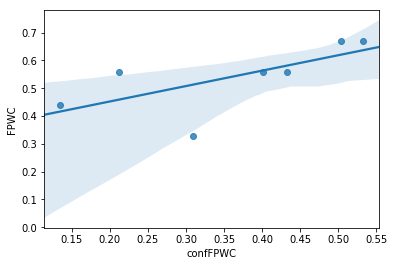

In [80]:
sns.regplot(x="confFPWC", y="FPWC", data=dfRenamedConf, ci=95)

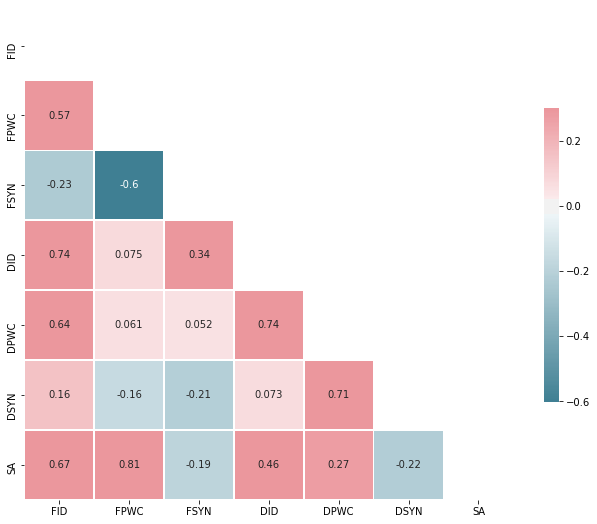

In [65]:
corr = dfRenamed.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6})

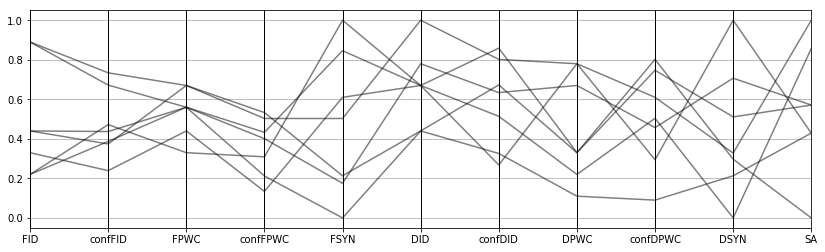

In [84]:
tempvis = visualization.Visualizer()
tempvis.parallelCoordinates(columns=['FID','confFID','FPWC','confFPWC','FSYN','DID','confDID','DPWC','confDPWC','DSYN','SA'], 
                                colors=["black"]*3,
                                dataFrame=dfRenamedConf,
                                grid=True,
                                figsize=(14,4), 
                                groupBy=None,
                               alpha=0.5)

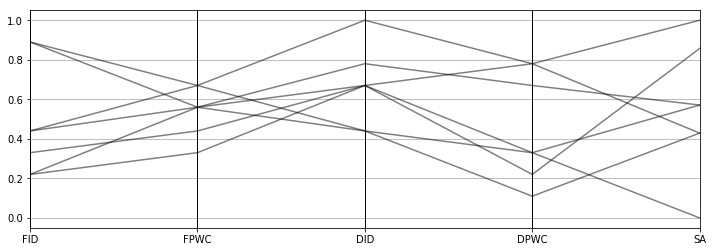

In [74]:
tempvis = visualization.Visualizer()
tempvis.parallelCoordinates(columns=['FID','FPWC','DID','DPWC','SA'], dataFrame=dfRenamed,
                                colors=["black"]*3,
                                grid=True,
                                figsize=(12,4), 
                                groupBy=None,
                               alpha=0.5)

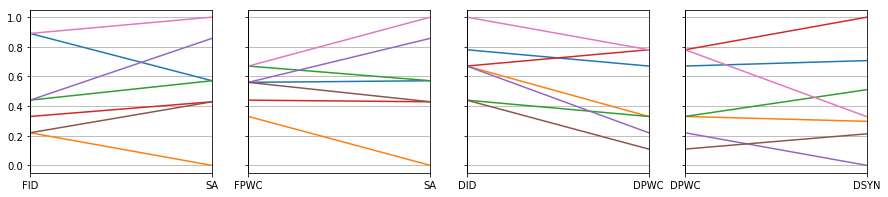

In [88]:
tempvis = visualization.Visualizer()
try:
    dfRenamed["index"]
except:
    dfRenamed["index"] = [i for i in range(len(dfRenamed["condition"].values))]
tempvis.parallelCoordinateVariablePairs(varPairList=[
                                            ['FID','SA'],
                                            ['FPWC','SA'],
                                            ['DID','DPWC'],
                                            ['DPWC','DSYN'],
                                        ],
                                        colors=None,
                                        grid=True,
                                        groupBy="index",
                                        dataFrame=dfRenamed,
                                        removeLegend=True,
                                        nrows=1, ncols=4, sharey=True, figsize=(15,3))


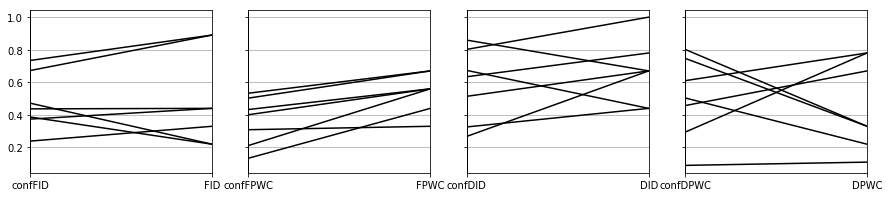

In [93]:
tempvis = visualization.Visualizer()
try:
    dfRenamedConf["index"]
except:
    dfRenamedConf["index"] = [i for i in range(len(dfRenamedConf["condition"].values))]
tempvis.parallelCoordinateVariablePairs(varPairList=[
                                            ['confFID','FID'],
                                            ['confFPWC','FPWC'],
                                            ['confDID','DID'],
                                            ['confDPWC','DPWC'],
                                        ],
                                        colors=["black"]*3,
                                        grid=True,
                                        groupBy="index",
                                        dataFrame=dfRenamedConf,
                                        removeLegend=True,
                                        nrows=1, ncols=4, sharey=True, figsize=(15,3))
